# Machine Learning in a Nutshell with scikit-learn
    
## Unsupervised Learning: Clustering


by [__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/) and [Konstantin Ziegler (konstantin.ziegler@uni-passau.de)](http://zieglerk.net) based on examples from the [scikit-learn documentation](http://scikit-learn.org/stable/)

__License__

This work is licensed under a [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/)


## Outline

1. Overview
2. Partition-based, iterative Clustering - K-Means
3. Hierarchical Agglomerative Clustering - Ward
4. Density based Clustering - DBSCAN
5. Evaluation Measures

# Overview

Unsupervised learning aims to find hidden structures in data. 

* **Clustering** identifies groups of similar data samples. Data samples should be maximize intra group similarity and mininmize intergroup similarity.

* **Dimensionality Projection** aims to project a high-dimensional space into a low dimensional space

* **Manifold Learning** aims to indentify lower-dimensional subspaces that contain a particular structure of data samples

In this notebook, we cover the basics applications with scikit-learn. For the underlying theory and more, see the references at the end of this page.

## Clustering


**Clustering**: Group $n$ data samples into $k$ clusters where the similarity among samples **within a cluster is maximized** and the similarity **between cluster is minimized** .

## Input Data

In scikit-learn, input to a clustering can take two different forms:

1. As a matrix consisting of `n_samples` and `n_features`
2. As a similarity (distance/dissimilarity) matrix of shape `[n_samples, n_samples]`

Given a **similarty measure** or **distance metric** between samples, the first approach can always be converted in the second approach. 


## Overview of clustering methods in scikit-learn

The following image gives an overview over scikit learn methods.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

Image taken from [scikit-learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html). You can find the generating code under `modules/plot_cluster_comparison.py`.

# K-Means Clustering

k-means is an iterative, partitioning clustering algorithm that minimizes

$$J(X,C)=\sum_{i=0}^{|X|}\min_{\mu_j\in C}(||x_i-\mu_j||^2)$$

with $X$ being the samples, $C$ being the number of clusters and $\mu_j$ being the representative of a cluster $c_j\in C$.

So basically it searches for a set of clusters that minimizes the squared distances of all data points to the cluster representative. In case of k-**means** the cluster representative is the mean vector of its data points

### Algorithm Sketch

1. **Initalise** $C$ by selecting $k$ cluster representatives $\mu_1 \ldots \mu_k$
2. **Partition** the data according to the cluster representatives, i.e. assign $x_i$ to the cluster $argmin_{\mu_j\in \{\mu_1 \ldots \mu_k\}}(||x_i-\mu_j||^2) $
3. **Recalculate** the cluster representatives $\mu_1 \ldots \mu_k$ as $\mu_j=\frac{1}{|c_j|}\sum_{x_i \in c_j}x_i$
4. If the partition does not change or a number of iteration is exceeded, stop. Otherwise go to 2.

### Usage in scikit-learn

* Module: `from sklearn.cluster import KMeans`
* Instantiate a object `kmeans = KMeans(....parameters...)`
* Fit to data: `model = kmeans.fit(data)`
* Assign data to cluster: `model.predict (data)`

In [1]:
from sklearn.cluster import KMeans
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 300
 |      Maximum number of iterations of the k-means algorithm for a
 |      single run.
 |  
 |  n_init : int, default: 10
 |      Number of time the k-means algorithm will be run with different
 |      centroid seeds. The final results will be the best output of
 |      n_init consecutive runs in terms of inertia.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up co

### Some Algorithmic Properties

* k-means is very sensitive to the starting points $\mu_i$
* k-means needs to know the number of clusters a-priori
* k-means can be applied on one sample per iteration (i.e. assignment and recalculation per sample), which is called online (or stochastic) k-means. Going over all samples before recalculating the representatives is called (full-)batch. There a differences in convergence rate and stopping criterion.
* k-means finds only cluster of approximately similar size that induce a [Voronoi tessellation](https://en.wikipedia.org/wiki/Voronoi_diagram)

<a href="http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html" target="_blank"><img src="https://pythonprogramming.net/static/images/unsupervised-learning/plot_kmeans_digits_001.png"></a>
(image from scikit Learn. You can find the generating code under `modules/plot_kmeans_digits.py`)

### Warmup: k-means on random data

In this exercise you should apply the scikit-learn k-means algorithm (`from sklearn.cluster import KMeans`) and evaluate it visually on a 2D dataset that is randomly created using a uniform and normal distribution (use `numpy.random.randn` and `numpy.random.ranf`). 

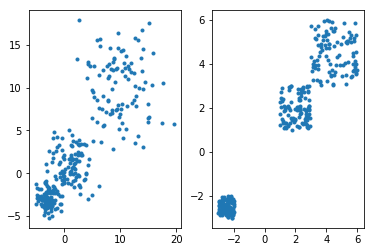

In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

#create the data 
normal2D= np.array(np.random.randn(100,2))*2+1
normal2D= np.append(normal2D,np.random.randn(100,2)*3+10,axis=0)
normal2D= np.append(normal2D,np.random.randn(100,2)*1-3,axis=0)

uniform2D= np.array(np.random.ranf((100,2))*2+1)
uniform2D= np.append(uniform2D,np.random.ranf((100,2))*3+3,axis=0)
uniform2D= np.append(uniform2D,np.random.ranf((100,2))*1-3,axis=0)

#plot the data
plt.subplot(1,2,1)
plt.plot(normal2D[:,0],normal2D[:,1],".")
plt.subplot(1,2,2)
plt.plot(uniform2D[:,0],uniform2D[:,1],".")

plt.show()

**Question 1**: The code below applies k-means to the datasets.
- Experiment with the three parameters and compare the quality of the clusterings.
- Which choice of parameters do you deem optimal? -- Why?
- What are reasonable a-priori estimates (bounds) for the number of clusters?

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


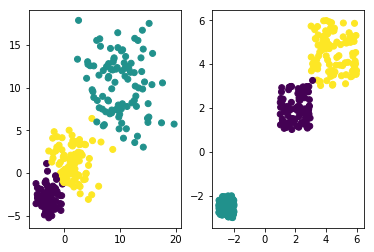

In [3]:
%time
from sklearn.cluster import KMeans

clustering = KMeans(init='random', n_clusters=3, n_init=2000)
labels_normal = clustering.fit_predict(normal2D)
labels_uniform = clustering.fit_predict(uniform2D)

#and plot it
plt.subplot(1,2,1)
plt.scatter(normal2D[:,0], normal2D[:,1], c=labels_normal)
plt.subplot(1,2,2)
plt.scatter(uniform2D[:,0], uniform2D[:,1], c=labels_uniform)
plt.show()

**Answers/Hints for Question 1:** (highlight to view)

<font color="white">

- init 'kmeans++' (which spreads the starting points) is stictly better than init 'random', because we avoid bad initialisations which yield bad results if the iteration_number is low <br/>

- init, see above. n_clusters=3 (domain knowledge), <br/>

- If possible, have a look (!) at a projection to lower dimensions => lower bound for the number of clusters and thus a starting value for incremental search using evaluation measures (see below) <br/>

</font>


**Question 2**: Take a look at other examples running sckit-learn 's k-means.
 - [Comparison of the K-Means and MiniBatchKMeans](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#example-cluster-plot-mini-batch-kmeans-py)
 - [Online learning of a dictionary of parts of faces](http://scikit-learn.org/stable/auto_examples/cluster/plot_dict_face_patches.html#example-cluster-plot-dict-face-patches-py)
 - [Clustering text documents using k-means](http://scikit-learn.org/stable/auto_examples/text/document_clustering.html)
  
- What is the differences between stochastic and batch k-means? (Which is scikit-learn using?)
- Estimate the impact of the k-means parameters (k, seeding) on learning patches of faces
- How could you calculate a representative keywords for each cluster when clustering text


**Answers/Hints for Question 2:** (highlight to view)

<font color="white">

- Batch with the variant that in MiniBatch the starting points are chosen from a sample of the complete dataset

- (open question)

- Compute mean (center of gravity) of cluster and choose closest word

</font>

# Hierarchical Agglomerative Clustering

In [4]:
faces.data[0]

NameError: name 'faces' is not defined

* Hierarchical Agglomerative Clustering forms a family of clustering algorithms that build hierarchically nested clusters
* The resulting tree is called a dendrogram
* Agglomerative means bottom up:
  - First, all data points form a single cluster
  - Second, nearest clusters are merged until only one cluster remains
* Critical is the distance measure between clusters (i.e. group of data samples)

### Usage in scikit-learn

Scikit implements the Hierarchical Agglomerative Clustering as follows.
* Module: `from sklearn.cluster import AgglomerativeClustering`
* Instantiate a object `clustering = AgglomerativeClustering(....parameters...)`
* Fit to data: `model = clustering.fit(data)`
* (Optional) Assign new data to cluster: `model.predict(data)`

The possible parameters for distance measure between the clusters are
- linkage='ward': Ward Criterion for variance-minimization of clusters
- linkage='average': average of distances between two sets
- linkage='complete': maximum of distances between two sets

Scikit also allows to add connectivity constraints, i.e. that cluster only merge with certain other samples. This can be helpful for image clustering when limiting clusters to form homogeneous regions in the image

### Project 2.2: Using HAC for Image Clustering

Below, you find code to examine the effect of linkage options for HAC, taken from [Ward Demo on the scikit-learn homepage](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). (Author: Gael Varoquaux, License: BSD 3 clause (C) INRIA 2014) It uses the [Digits Database](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) which contains ~1800 images (8x8) of digits with associated labels.

* Run the code below and try to understand what happens. (Several parts are merely dedicated to improving the presentation. First of all, you want to identify the part where the clustering takes place.)

Computing embedding
Done.
ward : 0.27s
average : 0.17s
complete : 0.18s


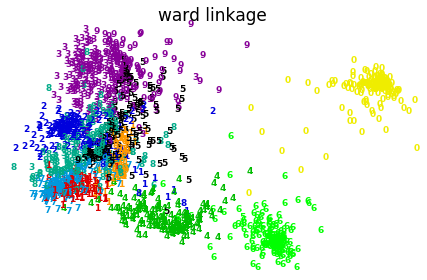

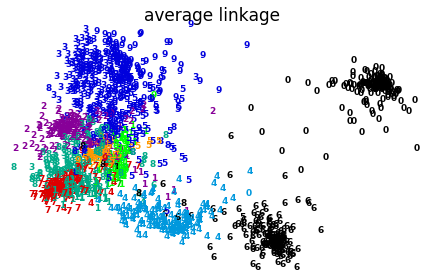

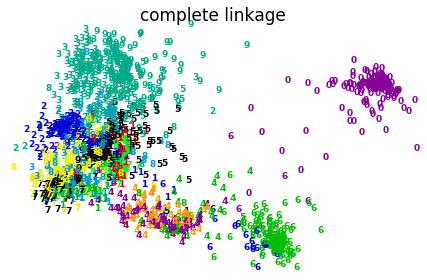

In [5]:
from time import time
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


# X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

**Question 3**: We want to understand the effect of the linkage strategies.

- Change the number of loaded digits (parameter `n_class` for `datasets.load_digits`) and the number of clusters (parameter `n_clusters` for `AgglomerativeClustering`). In case that you had only a rough guess for the former, how would you approach choosing the latter?
- Which linkage strategy seems to perform best and can you explain this from their definition.

**Hints/Answers to Question 3**: (highlight to view)

<font color="white">

- Eventually, the "best" number of clusters is *at least* the number of digits (because a single digit may occur in several unrelated clusters -- think two ways to spell 7). So, I'd suggest to start at the lower bound of your estimate and then increase in small increments.

- "Ward" is preferable, because instead of merely looking at distances, it also considers the "shape" (variance) of its clusters; it also avoids making an outlier a single cluster.

</font>

# DBScan - Density-based Clustering

* Density-based Clustering aims to find regions of high density that are separated via regions of low density.
* DBScan differentiates between noise points, core points and border points by defining an $\epsilon$ environment around a point $x_i$ in which a certain number of points must exists so that $x_i$ qualifies as core point
* Border points can be ambiguos, i.e. can belong to two differnt clusters where they fall in the $\epsilon$ region (but do not form a core point)

#### Usage in scikit learn

* Module: `from sklearn.cluster import DBSCAN`
* Instantiate a object `clustering = DBSCAN(....parameters...)`
* Fit to data: `model = clustering.fit(data)`

The implementation of the algorithm is non-deterministic, i.e. it is dependent on the order of the data. Core points of a cluster will be always assigned to the same cluster, but the cluster number might change depending which cluster core point is taken first.



### Project 2.3: Apply scikit-learn DBScan using Random Data

**Question 4**: In this exercise you should apply the scikit-learn DBSCAN algorithm and evaluate it visually on the 2D dataset from the k-Means exercise.

- Read the documentation for the parameter settings and try different settings to better fit the algorithm to the data. How crucial is $\epsilon$? How does the clustering results compare to the k-means algorithm?
- How could you estimate $\epsilon$ and the number of points in the $\epsilon$ region?
- How well can you fit the parameter and where is the problem?

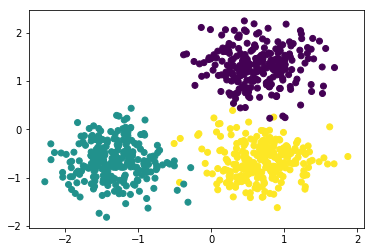

In [6]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# generate data
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

# rescale to mean 0 and variance 1b
X = StandardScaler().fit_transform(X)


plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

/root/anaconda3/lib/python3.5/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


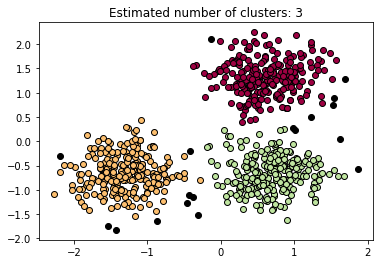

In [7]:
clustering = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k')

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**Hint/Answers to Question 4:** (highlight to view)
<font color="white">
- Oh well, for the left picture, DBSCAN has a hard time finding the three inherent clusters, since the density is different for the two on the left bottom (denser) in comparison to the one on the top right (sparser).
</font>

# Clustering Evaluation

The quality of clustering has to be measured, otherwise results can be abritrary (especially for high dimensional data where visualisation of clusters is not possible)

Cluster quality measure can be distinguished between

2. **External Validity Indices** that rely on a given correct assignment of points to groups
1. **Internal Validity Indices** that indicate the quality of the shape of an cluster without relying on the correct assignment of points to cluster

These measures are often used for finding the best parameters in a **relative validation**.

### Realisation in scikit-learn

Scikit learn implements a number of validity measures. See [the tutorial](http://scikit-learn.org/stable/modules/clustering.html#clustering) for an overview. 

We will start with an example for an external and internal measure, respectively.


### Rand Index (External)

Given a ground truth class (i.e. data samples are assigned to classes), the rand index *compares the number of pairs* of data sample that do/do not end up togehter *in the same cluster* to the pairs that do/do not *end up together in a ground truth class*

Formally, 

* let $C$ be a set of ground truth classes that assignes one data sample to one class $c$. 
* let $K$ be the clustering that assignes one data sample to one cluster $k$
* let $a$ be the number of all pairs of elements that are in the same class $c\in C$ and in the same cluster $k\in K$
* let $b$ be the number of pairs of elements that are in different classes in $c\in C$ and in different clusters $k\in K$

The rand index is then defined as
$$
RI=\frac{a+b}{number\;of\;all\;pairs}
$$
This can be determined without matching clusters to classes.

In [8]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

 
print("Same assignment:", metrics.adjusted_rand_score(labels_true, labels_true))
print("Good assignments: ", metrics.adjusted_rand_score(labels_true, labels_pred))
print("Bad assignment:", metrics.adjusted_rand_score(labels_true, [0,1,2,0,1,2]))

Same assignment: 1.0
Good assignments:  0.242424242424
Bad assignment: -0.363636363636


### Silhouette Coefficient (Internal)

The Silhouette Coefficient (`sklearn.metrics.silhouette_score`) is an example of an internal evaluation, where a higher Silhouette Coefficient score relates to a model with better shaped clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

* `dWithin`: The mean distance between a sample and all other points in the same cluster.
* `dNext`: The mean distance between a sample and all other points in the next nearest cluster.

The Silhoeutte Coefficient s for a single sample is then given as:

$$
s = \frac{\textsf{dNext} - \textsf{dWithin}}{\max(\textsf{dNext}, \textsf{dWithin})}
$$

The Silhouette Coefficient of a clustering is the *mean* of Silhouette Coefficients over all points

/root/anaconda3/lib/python3.5/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


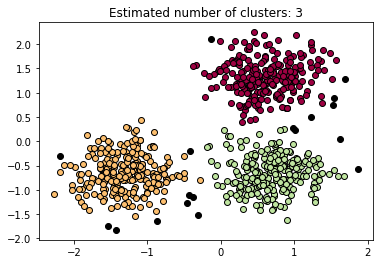

Adjusted Rand Index: 0.952
Silhouette Coefficient: 0.626


In [9]:
# Concatenated from DBScan above

% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# generate data
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

# rescale to mean 0 and variance 1b
X = StandardScaler().fit_transform(X)

clustering = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k')

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

if n_clusters_ > 1:
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(y, labels))
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))


## Project 2.4: Cluster the iris data set and evaluate the result

Load the [Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) and evaluate both, shilouette coefficient and rand index with different clustering results generated either via k-means or dbscan. Compare both evaluation measures with each other over a different set of clustering result (e.g. vary k or vary $\epsilon$ and/or the number of points in the epsilon environment).

The Iris Dataset contains 150 samples with 3 features and 1 label each. There are three possible labels (Setosa, Versicolour, and Virginica).

In [10]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
print(dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

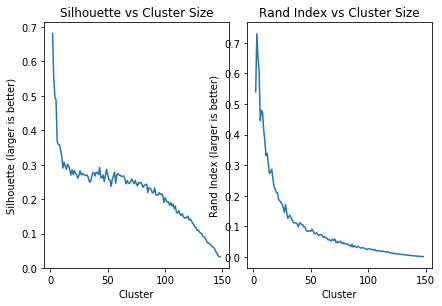

In [12]:
import pylab as pl
# do it for the k-means
s = []
r = []
k = range(2,149)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(X)
    labels = kmeans_model.labels_
    s.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    r.append(metrics.adjusted_rand_score(y, labels) )
    
pl.subplot(1,2,1)
pl.tight_layout()
pl.plot(k,s)
pl.ylabel("Silhouette (larger is better)")
pl.xlabel("Cluster")
pl.title("Silhouette vs Cluster Size")
pl.subplot(1,2,2)
pl.plot(k,r)
pl.ylabel("Rand Index (larger is better)")
pl.xlabel("Cluster")
pl.title("Rand Index vs Cluster Size")

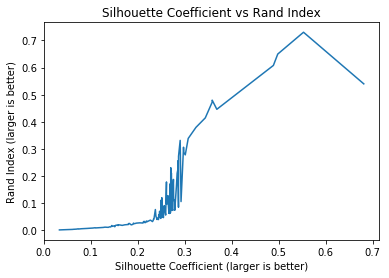

In [13]:
pl.figure()
(s,r) = zip(*sorted(zip(s,r), key = lambda t: t[0]))
pl.plot(s,r)
pl.xlabel("Silhouette Coefficient (larger is better)")
pl.ylabel("Rand Index (larger is better)")
pl.title("Silhouette Coefficient vs Rand Index")
pl.show()

**Question 5**: 
- Given the graphs above, what is your choice for the number of clusters? Why?
- Replace the Iris Dataset by larger dataset from scikit-learn.org/stable/datasets/ and produce similar graphs. Cluster (!) your results.


# Further References and Reading

- [Lecture Notes on the Course Machine Learning and Data Mining](http://www.uni-weimar.de/en/media/chairs/webis/teaching/lecturenotes/#machine-learning). 
- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, [Introduction to Data Mining](http://www.pearsonhighered.com/educator/academic/product/0,1144,0321321367,00.html), Addison-Wesley, 2006. ISBN 0-321-32136-7. 
- [Unsupervised learning: seeking representations of the data](http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html), scikit-learn Tutorial.
